<p><font size="6"><b> Introductie tot geospatiale vector data in Python</b></font></p>


> *GCCA+ phase 2 - Geopyhton training*  
> *June, 2023*
>
> *© 2023, Jasper Feyen  (<mailto:jasperfeyen@hotmail.com>)*

---
---

In [2]:
%matplotlib inline

import pandas as pd
import geopandas

C:\Users\jaspe\AppData\Local\Temp\ipykernel_19232\3931799419.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


## Importeren van GeoDataFrames

Geospatiale gegevens zijn vaak beschikbaar in specifieke GIS-bestandsindelingen of gegevensopslagplaatsen, zoals ESRI shapefiles, GeoJSON-bestanden, geopackage-bestanden, PostGIS (PostgreSQL) databases, ...

We kunnen de GeoPandas-bibliotheek gebruiken om veel van die GIS-bestandsindelingen te lezen (met behulp van de `fiona`-bibliotheek onder de motorkap, die een interface is naar GDAL/OGR), met behulp van de functie `geopandas.read_file`.

Laten we bijvoorbeeld beginnen met het lezen van een shapefile met alle landen ter wereld (aangepast van [deze bron](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/), het zipbestand is beschikbaar in de `/data`-map), en de gegevens inspecteren:


In [3]:
countries = geopandas.read_file("data/ne_10m_admin_0_countries.zip")
# Of indien je een uitgepakte schapefile beschikt:
# countries = geopandas.read_file("data/ne_10m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [4]:
countries.head()

name iso_a3      pop_est  gdp_md_est continent  \
0               Japan    JPN  126264931.0     5081769      Asia   
1             Bahrain    BHR    1641172.0       38574      Asia   
2  Republic of Serbia    SRB    6944975.0       51475    Europe   
3             Myanmar    MMR   54045420.0       76085      Asia   
4            Pakistan    PAK  216565318.0      278221      Asia   

                                            geometry  
0  MULTIPOLYGON (((141.45297 24.22240, 141.46998 ...  
1  MULTIPOLYGON (((50.79330 25.65204, 50.81671 25...  
2  POLYGON ((20.24283 46.10809, 20.30566 46.05357...  
3  MULTIPOLYGON (((98.05747 9.79686, 98.01832 9.7...  
4  MULTIPOLYGON (((67.37550 24.06273, 67.39039 24...

<AxesSubplot:>

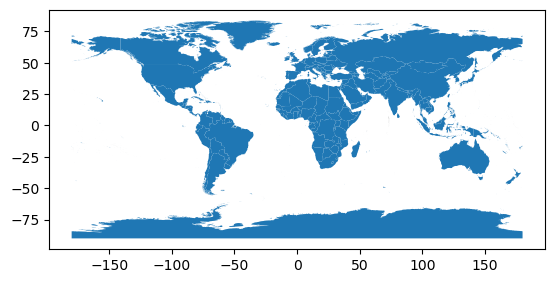

In [5]:
countries.plot()

In [6]:
countries.explore()

Wat observeren we:

- Met behulp van `.head()` kunnen we de eerste rijen van de dataset bekijken, net zoals we met Pandas kunnen doen.
- Er is een `geometry`-kolom en de verschillende landen worden weergegeven als polygonen.
- We kunnen de methode `.plot()` (matplotlib) of `explore()` (Folium / Leaflet.js) gebruiken om snel een *basis* visualisatie van de gegevens te krijgen.

## Wat is een GeoDataFrame?

We hebben de GeoPandas-bibliotheek gebruikt om de geospatiale gegevens in te lezen, en dit heeft ons een `GeoDataFrame` als output gegeven.

In [7]:
type(countries)

geopandas.geodataframe.GeoDataFrame

Een GeoDataFrame bevat een tabulaire, geospatiala dataset:

* Het heeft een **'geometry' kolom** die de geometrie-informatie bevat (of kenmerken in GeoJSON).
* De andere kolommen zijn de **attributen** (of eigenschappen in GeoJSON) die elke geometrie beschrijven.

Een dergelijke `GeoDataFrame` is vergelijkbaar met een pandas `DataFrame`, maar heeft enkele extra functionaliteiten voor het werken met geospatiale data:

* Een `.geometry` attribuut dat altijd de kolom met de geometrie-informatie bevat (als een GeoSeries). De naam van de kolom hoeft niet per se 'geometry' te zijn, maar deze zal altijd toegankelijk zijn onder de `.geometry` attribuut.
* Het heeft enkele extra methoden voor het werken met ruimtelijke gegevens (oppervlakte, afstand, buffer, intersectie, ...), waar we in deze notebooks even onder ons vergrootglas zullen houden.

In [8]:
# GeoDataframes bevatten dus steeds een geometry-attribuut:
countries.geometry

0      MULTIPOLYGON (((141.45297 24.22240, 141.46998 ...
1      MULTIPOLYGON (((50.79330 25.65204, 50.81671 25...
2      POLYGON ((20.24283 46.10809, 20.30566 46.05357...
3      MULTIPOLYGON (((98.05747 9.79686, 98.01832 9.7...
4      MULTIPOLYGON (((67.37550 24.06273, 67.39039 24...
                             ...                        
204    POLYGON ((16.94504 48.60417, 16.94690 48.53973...
205    MULTIPOLYGON (((-58.42643 1.46981, -58.49888 1...
206    MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...
207    MULTIPOLYGON (((70.95896 40.23837, 70.97952 40...
208    MULTIPOLYGON (((102.39967 12.04316, 102.44117 ...
Name: geometry, Length: 209, dtype: geometry

In [9]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [10]:
countries.geometry.area

C:\Users\jaspe\AppData\Local\Temp\ipykernel_19232\3077649407.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       38.170603
1        0.061546
2        8.743335
3       57.754142
4       81.710658
          ...    
204     10.044044
205     16.057065
206    103.578153
207     14.700796
208     43.332714
Length: 209, dtype: float64

**Het is nog steeds een DataFrame**, dus we hebben alle functionaliteit van Pandas beschikbaar om te gebruiken op de geospatiële dataset en om gegevensmanipulaties uit te voeren met de attributen en geometrie-informatie samen.

Bijvoorbeeld, we kunnen het gemiddelde bevolkingsaantal van alle landen berekenen (door toegang te krijgen tot de 'pop_est' kolom en de `mean` methode erop aan te roepen):

In [11]:
countries['pop_est'].mean()

36189138.65215311

Ook Boolean filtering werkt nog steeds:

<AxesSubplot:>

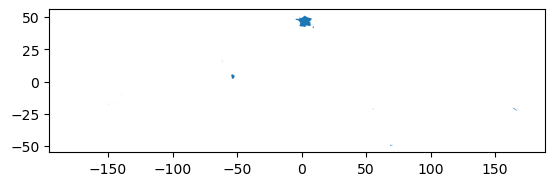

In [12]:
countries[countries['name']== 'France'].plot()

In [ ]:
South_America = countries[countries['continent'] == 'South America']

<div class="alert alert-info" style="font-size:120%">

**ONTHOUD:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

<div class="alert alert-success">

**OEFENING 1**:

Maak een visualisatie van de landsgrenzen van Suriname.

Opmerking: De 'countries' dataset heeft een lage graad van detail en is afkomstig van https://www.naturalearthdata.com/downloads/. Vectorfiles met hogere kwaliteit kunnen hier ook worden gedownload.
    
</div>

In [15]:
# %load _solutions/03-introduction-geospatial-data_1.py


## Geometries: Points, Linestrings and Polygons

**Spatiale vectoren** kunnen bestaan uit verschillende typen, en de 3 fundamentele typen zijn:

![](../img/simple_features_3_text.svg)

* **Puntdata**: vertegenwoordigt een enkel punt in de ruimte.
* **Lijndata** ("LineString"): vertegenwoordigt een reeks punten die een lijn vormen.
* **Polygoondata**: vertegenwoordigt een gevuld gebied.

En elk van deze typen kan ook worden gecombineerd in meerdelige geometrieën (zie https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects voor een uitgebreid overzicht).


Tot nu toe hebben we steeds de geometrie geplot van een enkele polygoon:

In [16]:
print(countries.geometry[2])

POLYGON ((20.24282596900008 46.10809112600005, 20.305664510000042 46.053572490000036, 20.35393029800005 45.97667795900004, 20.481674439000074 45.912702535000065, 20.572108195000055 45.887691142000065, 20.636703735000083 45.827023011000094, 20.64590214000009 45.78873077499999, 20.688070109000137 45.743100484000095, 20.726827433000068 45.736175842000094, 20.765171346000102 45.76676829100002, 20.785738566000077 45.75255727200006, 20.777263631000096 45.657524312000035, 20.754422648000087 45.60558949900003, 20.80020796700012 45.53050364200003, 20.760727173000078 45.493348288000035, 20.767135050000036 45.47934397400003, 20.816020955000113 45.46285919200004, 20.981488891000083 45.33278961200001, 21.09155969200009 45.28808949800005, 21.139412069000088 45.303695781, 21.239250936000104 45.229385071000095, 21.405545695000086 45.19967112200003, 21.493292277000137 45.1451008100001, 21.494119100000148 45.11931427000009, 21.44244266700011 45.09290761300012, 21.421875447000048 45.031412659000026, 21.3

Laten we enkele andere datasets importeren met verschillende soorten geometrie-objecten.

Een dataset over steden in de wereld (aangepast van http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, het zip-bestand is beschikbaar in de `/data`-map), bestaande uit puntgegevens:

In [17]:
cities = geopandas.read_file("data/ne_110m_populated_places.zip")

In [18]:
print(cities.geometry[0])

POINT (12.453386544971766 41.903282179960115)


En een dataset van rivieren in de wereld (van http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, het zip-bestand is beschikbaar in de `/data`-map) waarbij elke rivier een (multi-)lijn is:

In [21]:
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

In [22]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.880866467313695 55.68625891701544, 51.82031249962222 55.697455145538584, 51.747601827462404 55.69366250841807, 51.6628417966117 55.608172918745254, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.508544921610905 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.213062548697735 55.50264985760492, 51.13452148447897 55.48273346527725, 51.079345702742046 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.401190496444315, 50.07802734358711 55.381122137576654, 49.822167968676865 55.334662176818085, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### Over de `shapely` bibliotheek

De individuele geometrie-objecten worden geleverd door de [`shapely`](https://shapely.readthedocs.io/en/stable/) bibliotheek.

In [23]:
type(countries.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Om er zelf een te construeren:

In [24]:
from shapely.geometry import Point, Polygon, LineString

In [25]:
p = Point(0, 0)

In [26]:
print(p)

POINT (0 0)


In [27]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [28]:
polygon.area

0.5

In [29]:
polygon.distance(p)

1.4142135623730951

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

**Enkele geometrieën worden vertegenwoordigd door `shapely`-objecten:**

* Als je toegang krijgt tot een enkele geometrie van een GeoDataFrame, krijg je een shapely-geometrieobject.
* Deze objecten hebben vergelijkbare functionaliteit als geopandas-objecten (GeoDataFrame/GeoSeries). Bijvoorbeeld:
  * `single_shapely_object.distance(other_point)` -> afstand tussen twee punten
  * `geodataframe.distance(other_point)` -> afstand voor elk punt in de gegevensreeks naar het andere punt.


</div>

## Plotten van meerdere lagen

Je kunt meerdere datalagen gemakkelijk samen plotten. Voorwaarde is natuurlijk dat ze over hetzelfde Coordinatensysteem beschikken, maar daar gaan we in volgend notebook iets dieper op in.

[(-90.0, -30.0), (-60.0, 20.0)]

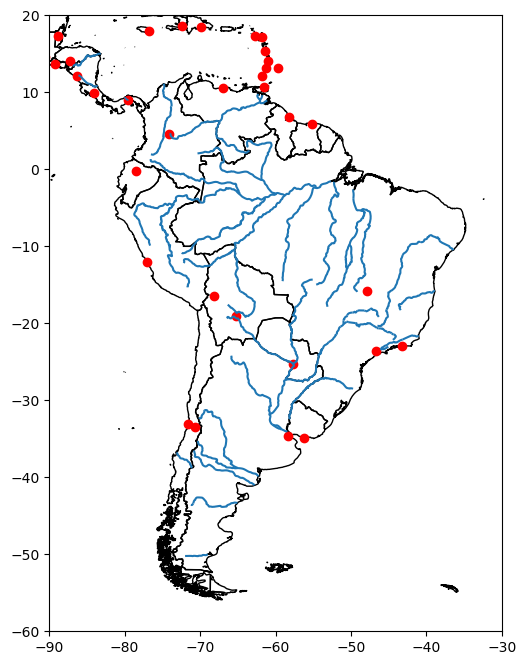

In [129]:
# fig, ax = plt.subplots(figsize=(10, 8))
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(10, 8))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-90, -30), ylim=(-60, 20))

EXTRA: Bekijk het notebook [visualization-02-geopandas.ipynb](visualization-02-geopandas.ipynb) voor meer details over het visualiseren van geospatiale datasets.

## OEFENINGEN: MANGROVE DATA

Zoals in vorige notebooks, oefenen we wat verder op onze mangrove-data. 
Hier starten we simpel, met volgende datasets

- De administratieve disctricten van Suriname (gedownload via Gonini)
- De locaties van de Sampling Units (SU's) en Principal Sampling Plots (PSP) gebruikt binnen het GCCA+ project

Beide datasets bevatten een geospatiale component en zijn daarom dus GIS-lagen.

In vorig hoofdstuk zagen we enkel tabeldata, maar nu koppelen we hier dus ook de spatiale context aan!

<div class="alert alert-success">

**OEFENING 2**:

We starten met het inladen van de mangrove-inventarisdata (beschikbaar als Shapefile: `data/mangrove/mangrove_2022.gpkg`)
    
* Lees de mangrove dataset als een GeoDataFrame met de naam `plotdata`.
* Bekijk het type van het eerste object
* Uit hoeveel rijen bestaat de dataset? Welke type geospatiale data betreft het?
* Hoeveel *features* zijn er aanwezig in de dataset?
    
<details><summary>Tips</summary>

* Gebruik `type(..)` om het type van elk Python object te achterhalen
* Gebruik de `geopandas.read_file()` functie voor het inlezen van geospatiale (vector) data.
* Gebruik de `.shape` attribuut om het aantal *features* te achterhalen

</details>
    
    
</div>

In [246]:
# %load _solutions/03-introduction-geospatial-data_2.py

In [ ]:
# %load _solutions/03-introduction-geospatial-data_3.py

In [247]:
# %load _solutions/03-introduction-geospatial-data_4.py


<div class="alert alert-success">

**OEFENING 2**:

* Maak een snelle plot van de `plotdata` dataset.
* Maak de plot een beetje groter door de grootte naar (12, 6) te brengen (hint: de `plot` methode accepteert een `figsize` argument).
 
</div>

In [248]:
# %load _solutions/03-introduction-geospatial-data_5.py

## Toevoegen van contextly

Een plot met alleen punten kan moeilijk te interpreteren zijn zonder enige ruimtelijke context. We hebben gezien dat we de explore()-methode kunnen gebruiken om eenvoudig een interactieve figuur te krijgen die standaard een achtergrondkaart bevat. Maar ook voor de statische plot gebaseerd op matplotlib kan het handig zijn om zo'n basis kaart toe te voegen, en dat is wat we in de volgende oefening zullen leren.

We gaan gebruik maken van het [contextily](https://github.com/darribas/contextily) pakket. De `add_basemap()` functie van dit pakket maakt het eenvoudig om een achtergrond webkaart aan onze plot toe te voegen. We beginnen met het plotten van onze data, en geven vervolgens het matplotlib as-object (bekomen door de `plot()` methode van het dataframe) door aan de `add_basemap()` functie. contextily zal dan de webtegels downloaden die nodig zijn voor het geografische bereik van je plot.


<div class="alert alert-success">

**OEFENING 3**:

* Importeer `contextily`.
* Maak opnieuw een figuur aan van alle plotpunten in `plotdata`, maar wijs dit nu toe aan een `ax` variable (bv `ax = plotdata.plot(...)`).
* Wijzig de grootte van de *markers* naar grootte 5 (gebruik de `markersize` keyword of binnen de `plot()` methode hiervoor).
* Gebruik de `add_basemap()` functie vab `contextily` en een achtergrond toe te voegen, als argument van de functie geef je de aangemaakte variabele `ax` op.

</div>

In [253]:
# %load _solutions/03-introduction-geospatial-data_6.py

<div class="alert alert-success">

**Oefening 4**:

* Maak een histogram die de distributie van het aantal Avicennia (zwarte mangrove) bomen over de plots weergeeft.

<details>
  <summary>Hints</summary>

* Een kolom selecteren kan via vierkante haakjes: `df['col_name']`
* Enkelvoudige kolomen kunnen adhv `hist()` methode een eenvoudige histogram plotten
    
</details>
    
</div>

In [256]:
# %load _solutions/03-introduction-geospatial-data_7.py

<div class="alert alert-success">

**OEFENING 5**:

We kunnen het aantal Avicennia-bomen ook visueel maken in onze plot:
    
* Maak een plot van de `plotdata` dataset
* Gebruik de kolom `Avicennia_count` om een kleur toe te voegen aan de punten. Hiervoor gebruik je de `column=` parameter binnen de `.plot()` methode.
* Extra: voeg `legend=True` argument toe aan de .plot() om een kleurenschaal te krijgen.
 
</div>

<AxesSubplot:>

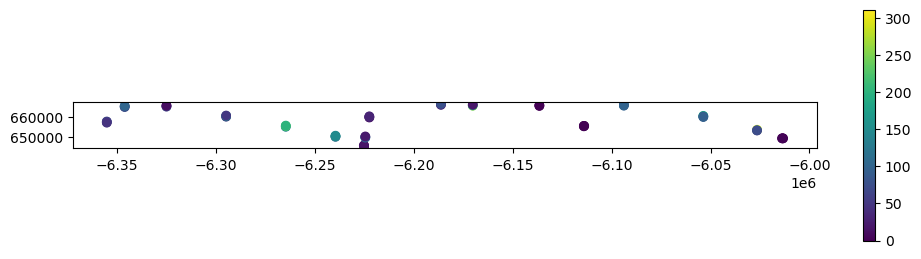

In [263]:
# %load _solutions/03-introduction-geospatial-data_8.py

<div class="alert alert-success">

**OEFENING 8**:

* Voeg een kolom `'tree_density'` toe, die het aantal bomen per ha weergeeft (in een plot).
    * Bereken hiervoor zelf eerst het totale aantal bomen in de plot (= som van de 3 type bomen)
    * Densiteit kan vervolgens berekend worden door aantal_bomen/(20*100*10**-4)
* Plot the plots opnieuw volgens  de ``tree_density'` . 
* Gebruik `legend=True` om een kleurenlegende toe te voegen.

</div>

In [191]:
# %load _solutions/03-introduction-geospatial-data_9.py

In [ ]:
# %load _solutions/03-introduction-geospatial-data_10.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data9.py

<div class="alert alert-success">

**OEFENING 6**:

Vervolgens zullen we de Beschermde natuurgebieden van Suriname wat bekijken.

* Lees de dataset `potected_areas.shp`.
* Bekijk de eerste rijen van de set. Welke soort geometry bevat deze laag?
* Hoeveel *features* zijn er aanwezig? (hint: use the `.shape` attribute)
* Maak een snelle plot van de `protected_areas` dataset (set the figure size to (12, 6)).
    
</div>

In [264]:
# %load _solutions/03-introduction-geospatial-data_11.py

In [264]:
# %load _solutions/03-introduction-geospatial-data_12.py

In [264]:
# %load _solutions/03-introduction-geospatial-data_13.py

<div class="alert alert-success">

**OEFENING 7**:
    
Wat is het grootste beschermd gebied (grootste oppervlakte)?

* Bereken de oppervlakte van elk district in km² naar een nieuwe kolom area_km2
* Voeg de oppervlakte toe aan de `protected_areas` dataframe.
* Sorteer je dataframe by op Area van hoog naar laag (descending).

<details><summary>Hints</summary>

* Het toevoegen van een nieuwe kolom aan een dataframe kan door het gebruiken van vierkante haakjes `df['new_col'] = values`
* via .area wordt de oppervlakte berekend in m². Door een vermenigvuldigen met `10**-6**` kun je dit omrekenen naar km².
* Om je DataFrame te sorteren kun je de `sort_values()` methode gebruiken. Je specifieert de kolom waarop er gesorteerd moet worden door de parameter `by='col_name'` toe te voegen aan de functie. Bekijk de help van deze functie om te achterhalen hoe je kan sorteren volgens *ascending* of *descending*.

</details>

</div>

In [297]:
# %load _solutions/03-introduction-geospatial-data_14.py

In [298]:
# %load _solutions/03-introduction-geospatial-data_14.py

---

## EXTRA: een Geodataframe halen uit een Pandas dataframe

Dit is handig als je bijvoorbeeld een tabel hebt met coordinaten in twee kolommen

In [233]:
# Colgende functie maakt een nieuwe pandas dataframe aan ter illustratie
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [234]:
df

City    Country  Latitude  Longitude
0  Buenos Aires  Argentina    -34.58     -58.66
1      Brasilia     Brazil    -15.78     -47.91
2      Santiago      Chile    -33.45     -70.66
3        Bogota   Colombia      4.60     -74.08
4       Caracas  Venezuela     10.48     -66.86

We wensen dit om te zetten naar een Geopandas dataframe, op basis van de longitude en latitude

In [239]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs = 'EPSG:4236')

In [242]:
gdf

City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)

Zie: https://geopandas.org/en/latest/gallery/create_geopandas_from_pandas.html voor een vollediger overzichtje